In [1]:
import pandas as pd
import sqlalchemy

In [2]:
%matplotlib inline

In [3]:
engine = sqlalchemy.create_engine('mysql+pymysql://root:@127.0.0.1:3306/Funcionario')

In [4]:
dfsalario = pd.read_sql_table('salario',engine)

In [5]:
dfsalario.head()

,id_funcionario,salario,DataInicial,DataFinal
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12


In [6]:
import matplotlib.pyplot as plt

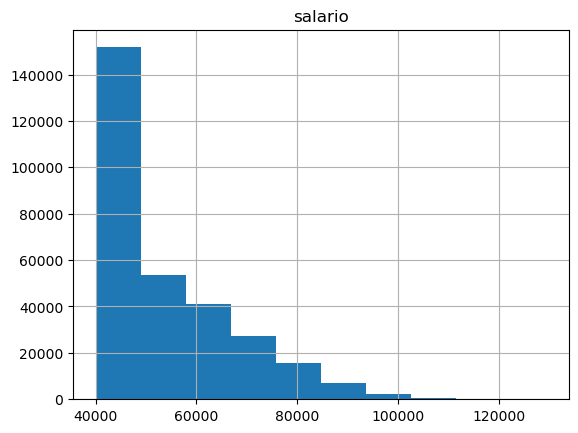

In [7]:
dfsalario.hist(column='salario', bins=10)
plt.show()

In [8]:
dffuncionario = pd.read_sql_table('funcionario',engine)
dftitulacao = pd.read_sql_table('titulacao',engine)

In [9]:
df = pd.merge(dftitulacao, dfsalario, on='id_funcionario')

In [10]:
display(df)

,id_funcionario,titulacao,DataInicial_x,DataFinal_x,salario,DataInicial_y,DataFinal_y
0,10001,Senior Engineer,1986-06-26,NaT,60117.0,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,NaT,65828.0,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,NaT,40006.0,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054.0,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,NaT,40054.0,1986-12-01,1987-12-01
...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,49597.0,1987-08-30,1988-08-29
443304,499997,Senior Engineer,1992-08-29,NaT,49597.0,1987-08-30,1988-08-29
443305,499998,Senior Staff,1998-12-27,NaT,40000.0,1993-12-27,1994-12-27
443306,499998,Staff,1993-12-27,1998-12-27,40000.0,1993-12-27,1994-12-27


In [11]:
df.drop(df.columns[[0,2,3,5,6]], axis=1, inplace=True)

In [12]:
df

,titulacao,salario
0,Senior Engineer,60117.0
1,Staff,65828.0
2,Senior Engineer,40006.0
3,Engineer,40054.0
4,Senior Engineer,40054.0
...,...,...
443303,Engineer,49597.0
443304,Senior Engineer,49597.0
443305,Senior Staff,40000.0
443306,Staff,40000.0


Text(0.5, 1.0, 'Salário X Titulação')

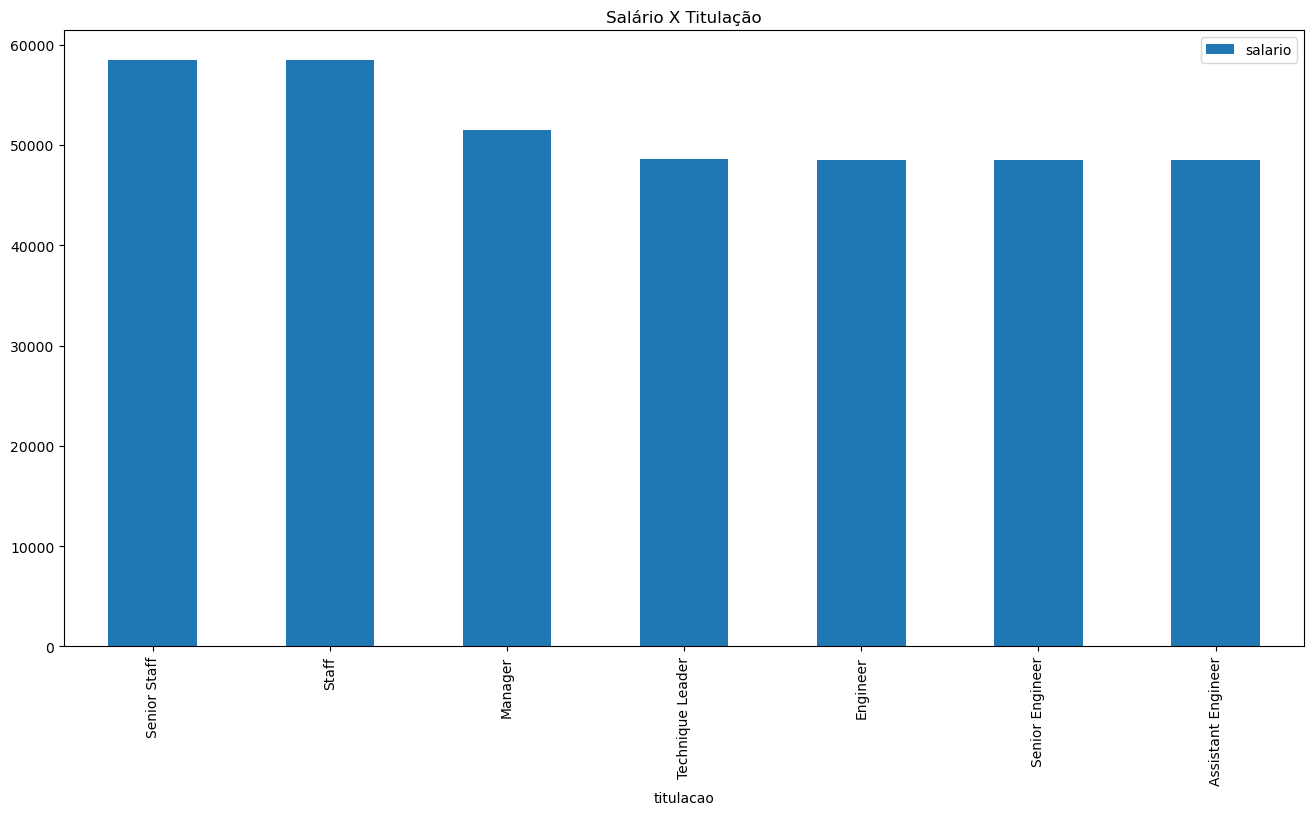

In [13]:

ax = df.filter(items=['titulacao', 'salario'])\
             .groupby(['titulacao'])\
             .mean().sort_values(by='salario', ascending=False)\
             .plot(kind = 'bar',figsize=(16,8))
ax.set_title('Salário X Titulação')